Student Name: Abhijit Sinha
Student ID: 18195067

## Task

###### Making use of Numpy, write a Python class to apply the PCA transform to the provided (see Notebook) data set. Compare the output of your implementation to the PCA functionality provided by the Scikitlearn module.

- Create a 'fit' method that calculates the eigen vectors and eigen values of your dataset. Compare your results to the output of Scikitlearn's fit method and document your findings as a comment (use markdown) directly under the cell with your PCA class.
- Use the Scikitlean's PCA class with n_components=2 and n_components=1 and observe the differences. In the cell directly below, comment on what you have observed.
- Add a property to your class and initialise this property in a suitable fashion to allow you to choose the number of principal components similar to the Scikitlearn PCA class.
- Store those results from your fit method that are required to transform the data set, in suitable class properties.
- Create a 'transform' method to perform the PCA data transformation on your data set using the parameters obtained using your 'fit' method.

###### N.B.:

- Limit your code to the aspects explicitly listed. 
- Use the Jupyter Notebook provided in the repository for week 5. This notebook contains the data that needs to be transformed.
- The required modules have already been imported for you. You should not import any other modules.
- If you find creating a class with this functionality daunting, please start by creating normal functions in your notebook. If time permits, you can then change to use of a class later.

### Reflection:

##### With your code (containing any corrections you have made based on your peers’ feedback), do the following:

- For the case where n_components = 1, compare the resulting dataset of your transform method with the resulting dataset from Scikitlearn’s transform method by plotting the points on an XY plot. If there are any differences, explain these in a comment directly under the cell with your plot.

- For the case where n_components = 1, compare the dataset resulting from your transform method with the original dataset by plotting the points on an XY plot. Comment on the differences between original and transformed data in the cell directly below your plot. In your comment, explain why and how PCA can be used for dimensionality reduction

In [12]:
%matplotlib inline
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [13]:
a_x = 0.05
a_y= 10

In [14]:
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

In [15]:
data.shape

(20, 2)

### Create a class to find PCA using numpy
- Making use of Numpy, creating a Python class to apply the PCA transform to the provided data set. 

Following the steps from the links below: 
    - http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf 
    - https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
    
- Step 1: Get some data
- Step 2: Subtract the mean
- Step 3: Calculate the covariance matrix
- Step 4: Calculate the eigenvectors and eigenvalues of the covariance matrix
- Step 5: Choosing components and forming a feature vector
- Step 6: Deriving the new data set

In [16]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

a_x = 0.05
a_y= 10
data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

class New_PCA:
    """Principal component analysis (PCA)
     
    Linear dimensionality reduction using Singular Value Decomposition of the
    data to project it to a lower dimensional space.
    """
    
    def __init__(self,n_components=None):
        self.n_components = n_components
        self.components_ = []
        
    def fit(self, data):
        """Fit the model with provided data"""
        # Step 1: Get the data
        self.data = data
        print("DATA")
        print(self.data)
       
        # Step 2: Get mean of data and centre around zero mean
        self.mean_data = self.data.mean(axis=0)
        print("MEAN")
        print(self.mean_data)
        
        # Center data
        self.data_with_zero_mean = self.data - self.mean_data
        print("CENTERED_DATA")
        print(self.data_with_zero_mean)

        # Step 3: Calculate the covariance matrix of the Centred Data
        self.covariance_matrix = np.cov(self.data_with_zero_mean, rowvar=False)
        print("COVARIANCE_MATRIX")
        print(self.covariance_matrix)
        
        # Step 4: Calculate the eigenvectors and eigenvalues of the covariance matrix
        self.eigen_values, self.eigen_vectors = eig(self.covariance_matrix) 
        
        print("EIGEN_VALUES")
        print(self.eigen_values)
        print("EIGEN_VECTORS")      
        print(self.eigen_vectors)
        print("EIGEN_VECTORS_SHAPE")
        print(self.eigen_vectors.shape)

        # Sort eigen valuess and eigen vectors    
        sort_index = self.eigen_values.argsort()[::-1]   
        sorted_eig_vals = self.eigen_values[sort_index]
        sorted_eig_vecs = self.eigen_vectors[sort_index]
        print("SORTED EIGEN VALUES")
        print(sorted_eig_vals)
        print("SORTED EIGEN VECTORS")
        print(sorted_eig_vecs)
        
        # n_components will filter the eigen vectors
        eigen_vals= sorted_eig_vals[:self.n_components]
        eigen_vecs = sorted_eig_vecs[:self.n_components] 
        print("FINAL EIGEN VALUES")
        print(eigen_vals)
        print("FINAL EIGEN VECTORS")
        print(eigen_vecs)
        
        self.components_ = eigen_vecs
        return eigen_vals, eigen_vecs
    
    def transform(self, data):
        """Transform the data by calculating the projection
        
        Projection = vectors.T.dot(C.T)
        """
    
        # Step 5: Choosing components and forming a feature vector and applying Projection
        self.projected_data = self.eigen_vectors.T.dot(self.data_with_zero_mean.T)
        
        plt.plot(data[:,0], data[:,1], 'ro')
        plt.plot(self.projected_data[:,0], self.projected_data[:,1], 'bx')
        plt.show()


### Function to check PCA using Scikit Learn modules

In [17]:
def scikitlearn_pca(n):
    pca = PCA(n_components=n)  #, whiten=True : scale and center data
    pca.fit(data)
    data_pca = pca.transform(data)
    data_reduced = pca.inverse_transform(data_pca)
    print(pca.components_)
    print(pca.explained_variance_)
    return data_reduced


### Test the code

 Select the n_componenets for PCA : 2

********* PCA Implemented for 2 component ***********
PCA Fit
DATA
[[ 0.         -1.83222326]
 [ 0.98801608  1.17917886]
 [ 2.03137775  6.8833331 ]
 [ 2.94104692 14.49584082]
 [ 3.9769767  13.82047862]
 [ 4.98167414 20.18027997]
 [ 6.06601234 28.08904602]
 [ 6.96898507 30.05704536]
 [ 7.97014102 35.33732762]
 [ 8.96826607 31.3581664 ]
 [ 9.873771   44.29018814]
 [11.12407419 44.92509293]
 [12.02068544 43.67875961]
 [13.18555173 56.03144859]
 [13.94689944 53.60360505]
 [14.90876556 60.84937266]
 [16.01560906 60.03121768]
 [17.03782241 63.88583621]
 [17.86656701 71.93360096]
 [18.90001735 76.03477371]]
MEAN
[ 9.48861296 37.74161845]
CENTERED_DATA
[[ -9.48861296 -39.57384171]
 [ -8.50059688 -36.56243959]
 [ -7.45723521 -30.85828535]
 [ -6.54756605 -23.24577763]
 [ -5.51163626 -23.92113984]
 [ -4.50693883 -17.56133848]
 [ -3.42260062  -9.65257243]
 [ -2.51962789  -7.68457309]
 [ -1.51847194  -2.40429083]
 [ -0.52034689  -6.38345205]
 [  0.38515804   6

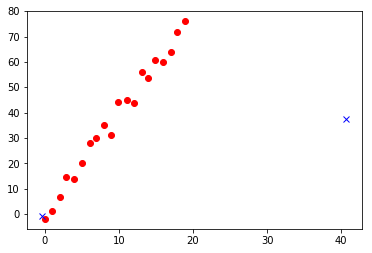

In [18]:
n = int(input(" Select the n_componenets for PCA : "))
if n == 1 or n == 2:
    pass
else:
    raise Exception("Please input n_componenets as 1 or 2")
    
    
print("\n********* PCA Implemented for {} component ***********".format(n))     
derived_pca = New_PCA(n)
print("PCA Fit")
derived_pca.fit(data)
print("DERIVED PCA COMPONENTS")
print(derived_pca.components_)
print("PCA Transform")
derived_pca.transform(data)



********** Scikitlean PCA  for 2 component **********
[[-0.24157669 -0.97038173]
 [-0.97038173  0.24157669]]
[5.89112979e+02 5.25045892e-01]


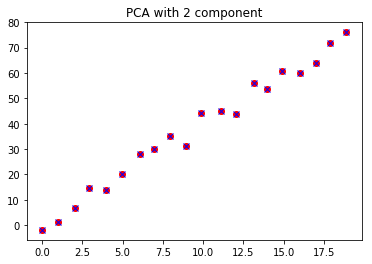

In [19]:
print("\n********** Scikitlean PCA  for {} component **********".format(n))
pca_result = scikitlearn_pca(n)
plt.title("PCA with {} component".format(n))
plt.plot(data[:,0], data[:,1], 'ro')
plt.plot(pca_result[:,0], pca_result[:,1],"bx")

###### Observation when n_component =1:
- The reconstructed data with one eigen vector doesnt excatly match the original data, but its very similar to the original data.

###### Observation when n_component =2:
- The reconstructed data almost match the original data.
